In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [3]:
UserTweets = pd.read_csv("/home/is/shuntaro-o/dev/persons_move_analysis/data/202210noGeo_ad_estimate.csv")
#UserPlase = pd.read_csv('/home/is/shuntaro-o/dev/disaster_analysis_Twitter/data/TweetPlaces_Japan7Cities/FoursquareUserPlacesTokyo_20210419.txt', sep=',', lineterminator='\n', header=None,names = ['place_id', 'city_name', 'object', 'country', 'UserPlase_longitude', 'UserPlase_latitude', 'UserPlase_sub_longitude', 'UserPlase_sub_latitude'])

In [4]:
UserTweets

,Unnamed: 0.1,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,author_id,username,author_followers,author_tweets,author_description,author_location,code_estimation
0,0,0,RT @midotakahaokazu: 10月になりました！サークル参加、お気に入りありが...,2022-10-01_00:59:58,22.0,0.0,0.0,0.0,1137201009669705728,yumehara3,33.0,3627,I'm an artist🇻🇳 and like Kuroko no basket🏀 i ...,NaN,5339
1,1,1,一回だけ30代の主婦のドMさん来たんだけど、次の日には垢消えてた😇,2022-10-01_00:59:58,0.0,0.0,0.0,0.0,433635408,namexlove,56.0,259,30代の男です。DMやカカオで痴態を見せてくれる女の子募集中。年齢、体型は問いません。学生さ...,NaN,5339
2,2,2,みんなからの匿名質問を募集中！こんな質問に答えてるよ● は？● 修行僧になったきっかけは？●...,2022-10-01_00:59:58,0.0,0.0,0.0,0.0,824221871281295360,mattyan_san,173.0,2707,囲碁もやる,家,5339
3,3,3,みんなからの匿名質問を募集中！こんな質問に答えてるよ● 今一番欲しいものは何？● アニメキャ...,2022-10-01_00:59:58,0.0,0.0,0.0,0.0,713935985516490752,hassy6119,1521.0,5676,音ゲーやイベント、カフェやボランティア好きです。よろしくお願いします。音ゲーリザルトや日常な...,NaN,5339
4,4,4,350連で４枚目出たので最後コインで交換して５凸完了です！！２回目の天井いかなくてよかった…...,2022-10-01_00:59:58,0.0,0.0,0.0,0.0,851766242016845824,icho5610,154.0,3425,舞台系のグッズ等の交換譲渡、お取引以外のこともつぶやきます。2.5中心に東宝ミュージカルなど...,NaN,5339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360833,360833,486,RT @anime_toman: ／🔥聖夜決戦編🔥 PV公開！＼新キャラクターたちが続々登...,2022-10-31_23:59:58,46135.0,0.0,0.0,0.0,1497120190588682243,amagi_puka_,1.0,368,一目惚れしました @333akina @02xv_,海洋生物部🐳,5339
360834,360834,487,RT @Tomorrow01: ルウタ結婚式カチコミまとめ①（代替テキストに裏話） #今月描...,2022-10-31_23:59:58,363.0,0.0,0.0,0.0,911937886986964993,Nemo175yugioh,366.0,60833,白猫、DBHやってます。無言フォローすることあるかもしれませんがよろしくです。（バトスタ25...,日本,5339
360835,360835,488,RT @Syunsaeki: 10周年ということで久々に描いてみました！ https://t...,2022-10-31_23:59:58,2563.0,0.0,0.0,0.0,1154241397,eternalfire4s,366.0,276175,漫画、アニメ、ゲーム、絵描き、特撮、食べ歩き、娯楽大好きです‼︎人生は楽しんだモン勝ち‼︎フ...,日本,5339
360836,360836,489,「線は、僕を描く」水墨画に初めて触れたけど、エンドロールも含めて、終始キレイ。葛藤を抱えなが...,2022-10-31_23:59:58,0.0,0.0,5.0,0.0,1372139551410429953,hori_teinei,78.0,143,ていねい通販／社会人4年目／CRM／SNS運用・分析担当／Web解析士／文章力・伝える力を鍛える,NaN,5339


In [5]:
df_one_day = UserTweets

In [6]:
df_one_day["created_at"]=df_one_day["created_at"].astype(str)
df_one_day = df_one_day.reset_index(drop=True)
created_time=df_one_day.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_one_day=pd.concat([df_one_day,creatid_at_day_list],axis=1)
df_one_day=df_one_day.rename(columns={0: 'creatid_at_day'})
df_one_day=pd.concat([df_one_day,creatid_at_hour_list],axis=1)
df_one_day=df_one_day.rename(columns={0: 'creatid_at_hour'})

In [7]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [8]:
df_one_day = df_one_day[df_one_day['creatid_at_day'].isin(day_list)]
df_one_day = df_one_day[df_one_day['creatid_at_hour'].isin(hour_list)]

In [9]:
df_one_day['created_at'] = pd.to_datetime(df_one_day['created_at'],format="%Y-%m-%d_%H:%M:%S")

In [10]:
df_one_day

,Unnamed: 0.1,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,author_id,username,author_followers,author_tweets,author_description,author_location,code_estimation,creatid_at_day,creatid_at_hour
0,0,0,RT @midotakahaokazu: 10月になりました！サークル参加、お気に入りありが...,2022-10-01 00:59:58,22.0,0.0,0.0,0.0,1137201009669705728,yumehara3,33.0,3627,I'm an artist🇻🇳 and like Kuroko no basket🏀 i ...,NaN,5339,01,00
1,1,1,一回だけ30代の主婦のドMさん来たんだけど、次の日には垢消えてた😇,2022-10-01 00:59:58,0.0,0.0,0.0,0.0,433635408,namexlove,56.0,259,30代の男です。DMやカカオで痴態を見せてくれる女の子募集中。年齢、体型は問いません。学生さ...,NaN,5339,01,00
2,2,2,みんなからの匿名質問を募集中！こんな質問に答えてるよ● は？● 修行僧になったきっかけは？●...,2022-10-01 00:59:58,0.0,0.0,0.0,0.0,824221871281295360,mattyan_san,173.0,2707,囲碁もやる,家,5339,01,00
3,3,3,みんなからの匿名質問を募集中！こんな質問に答えてるよ● 今一番欲しいものは何？● アニメキャ...,2022-10-01 00:59:58,0.0,0.0,0.0,0.0,713935985516490752,hassy6119,1521.0,5676,音ゲーやイベント、カフェやボランティア好きです。よろしくお願いします。音ゲーリザルトや日常な...,NaN,5339,01,00
4,4,4,350連で４枚目出たので最後コインで交換して５凸完了です！！２回目の天井いかなくてよかった…...,2022-10-01 00:59:58,0.0,0.0,0.0,0.0,851766242016845824,icho5610,154.0,3425,舞台系のグッズ等の交換譲渡、お取引以外のこともつぶやきます。2.5中心に東宝ミュージカルなど...,NaN,5339,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360833,360833,486,RT @anime_toman: ／🔥聖夜決戦編🔥 PV公開！＼新キャラクターたちが続々登...,2022-10-31 23:59:58,46135.0,0.0,0.0,0.0,1497120190588682243,amagi_puka_,1.0,368,一目惚れしました @333akina @02xv_,海洋生物部🐳,5339,31,23
360834,360834,487,RT @Tomorrow01: ルウタ結婚式カチコミまとめ①（代替テキストに裏話） #今月描...,2022-10-31 23:59:58,363.0,0.0,0.0,0.0,911937886986964993,Nemo175yugioh,366.0,60833,白猫、DBHやってます。無言フォローすることあるかもしれませんがよろしくです。（バトスタ25...,日本,5339,31,23
360835,360835,488,RT @Syunsaeki: 10周年ということで久々に描いてみました！ https://t...,2022-10-31 23:59:58,2563.0,0.0,0.0,0.0,1154241397,eternalfire4s,366.0,276175,漫画、アニメ、ゲーム、絵描き、特撮、食べ歩き、娯楽大好きです‼︎人生は楽しんだモン勝ち‼︎フ...,日本,5339,31,23
360836,360836,489,「線は、僕を描く」水墨画に初めて触れたけど、エンドロールも含めて、終始キレイ。葛藤を抱えなが...,2022-10-31 23:59:58,0.0,0.0,5.0,0.0,1372139551410429953,hori_teinei,78.0,143,ていねい通販／社会人4年目／CRM／SNS運用・分析担当／Web解析士／文章力・伝える力を鍛える,NaN,5339,31,23


In [11]:
df_Tokyo_station = df_one_day

In [12]:
df_Tokyo_station['created_at'] = pd.to_datetime(df_Tokyo_station['created_at'],format="%Y-%m-%d_%H:%M:%S")

In [13]:
df_Tokyo_station = df_Tokyo_station.dropna(subset=['created_at'])

In [14]:
df_Tokyo_station 

,Unnamed: 0.1,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,author_id,username,author_followers,author_tweets,author_description,author_location,code_estimation,creatid_at_day,creatid_at_hour
0,0,0,RT @midotakahaokazu: 10月になりました！サークル参加、お気に入りありが...,2022-10-01 00:59:58,22.0,0.0,0.0,0.0,1137201009669705728,yumehara3,33.0,3627,I'm an artist🇻🇳 and like Kuroko no basket🏀 i ...,NaN,5339,01,00
1,1,1,一回だけ30代の主婦のドMさん来たんだけど、次の日には垢消えてた😇,2022-10-01 00:59:58,0.0,0.0,0.0,0.0,433635408,namexlove,56.0,259,30代の男です。DMやカカオで痴態を見せてくれる女の子募集中。年齢、体型は問いません。学生さ...,NaN,5339,01,00
2,2,2,みんなからの匿名質問を募集中！こんな質問に答えてるよ● は？● 修行僧になったきっかけは？●...,2022-10-01 00:59:58,0.0,0.0,0.0,0.0,824221871281295360,mattyan_san,173.0,2707,囲碁もやる,家,5339,01,00
3,3,3,みんなからの匿名質問を募集中！こんな質問に答えてるよ● 今一番欲しいものは何？● アニメキャ...,2022-10-01 00:59:58,0.0,0.0,0.0,0.0,713935985516490752,hassy6119,1521.0,5676,音ゲーやイベント、カフェやボランティア好きです。よろしくお願いします。音ゲーリザルトや日常な...,NaN,5339,01,00
4,4,4,350連で４枚目出たので最後コインで交換して５凸完了です！！２回目の天井いかなくてよかった…...,2022-10-01 00:59:58,0.0,0.0,0.0,0.0,851766242016845824,icho5610,154.0,3425,舞台系のグッズ等の交換譲渡、お取引以外のこともつぶやきます。2.5中心に東宝ミュージカルなど...,NaN,5339,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360833,360833,486,RT @anime_toman: ／🔥聖夜決戦編🔥 PV公開！＼新キャラクターたちが続々登...,2022-10-31 23:59:58,46135.0,0.0,0.0,0.0,1497120190588682243,amagi_puka_,1.0,368,一目惚れしました @333akina @02xv_,海洋生物部🐳,5339,31,23
360834,360834,487,RT @Tomorrow01: ルウタ結婚式カチコミまとめ①（代替テキストに裏話） #今月描...,2022-10-31 23:59:58,363.0,0.0,0.0,0.0,911937886986964993,Nemo175yugioh,366.0,60833,白猫、DBHやってます。無言フォローすることあるかもしれませんがよろしくです。（バトスタ25...,日本,5339,31,23
360835,360835,488,RT @Syunsaeki: 10周年ということで久々に描いてみました！ https://t...,2022-10-31 23:59:58,2563.0,0.0,0.0,0.0,1154241397,eternalfire4s,366.0,276175,漫画、アニメ、ゲーム、絵描き、特撮、食べ歩き、娯楽大好きです‼︎人生は楽しんだモン勝ち‼︎フ...,日本,5339,31,23
360836,360836,489,「線は、僕を描く」水墨画に初めて触れたけど、エンドロールも含めて、終始キレイ。葛藤を抱えなが...,2022-10-31 23:59:58,0.0,0.0,5.0,0.0,1372139551410429953,hori_teinei,78.0,143,ていねい通販／社会人4年目／CRM／SNS運用・分析担当／Web解析士／文章力・伝える力を鍛える,NaN,5339,31,23


In [16]:
day=24
day = int(day)
df_perday = df_Tokyo_station[(df_Tokyo_station['created_at'].dt.day==day)]

In [17]:
df_perday

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,author_id,username,author_followers,author_tweets,author_description,author_location,code_estimation,0,creatid_at_day,creatid_at_hour
26453,249873,267026,12,RT @nekogaeru: 息子「パパ絵うますぎじゃんパパ「いちおうプロだしな息子「それは...,2022-10-24 00:59:58,8213.0,0.0,0.0,0.0,1084315018676494339,I_love_syalo,484.0,27150,アニメと声優と西武ライオンズが大好きです！いのりんに会いたい(切実)!! ともりるマジ最強ご...,ラビットハウスとトレセン学園に出没するそこそこトレーナー,5339,533946,24,00
26454,249875,267028,14,29歳男たち集まるのアツい,2022-10-24 00:59:58,0.0,0.0,0.0,0.0,1325398804942614529,o_095,607.0,12756,すこやかに推す 🛁@cr_mzh,🌈🕒,5339,533946,24,00
26455,249878,267032,18,ハヤカワのディックの文庫本、表紙秀逸すぎん？,2022-10-24 00:59:58,0.0,0.0,1.0,0.0,1513366693627985926,Udon_Don_Don__,110.0,7205,生きてる価値のないクズ,NaN,5339,533946,24,00
26456,249879,267033,19,RT @nemu____ui: コラボの好きだったシーン。 #描いた晴 https://t....,2022-10-24 00:59:58,51.0,0.0,0.0,0.0,1405389616539082752,yuyu_V_86,15.0,7975,ROF-MAO￤VΔLZ￤エデン組￤VOLTACTION￤ 🌞￤🦉🎻 ￤🍵￤🐈‍⬛￤🦊✌️￤...,NaN,5339,533946,24,00
26457,249886,267041,27,復路の方が遠回りなのに1時間以上早く着いてるし夜しか走りたくない,2022-10-24 00:59:58,0.0,0.0,0.0,0.0,1324451532,Airflow07F,628.0,73066,想いはひとつ,沼の底,5339,533946,24,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27624,260756,278655,461,この時期から毎年後鼻漏で死ぬけど寒さのせいでは…？体を温めていればいいのでは…？ Tシャツ短...,2022-10-24 23:59:58,0.0,0.0,2.0,0.0,1346874288658214913,nukinukki,109.0,48068,成人／いつも推しのすけべを考えています,メギド、アクナイ、たまにグラブル,5339,533946,24,23
27625,260762,278661,467,10/24に歩サラさんが配信された「fingger sports TV」配信の好きなシーンを...,2022-10-24 23:59:58,14.0,1.0,37.0,1.0,159986711,n_asch,332.0,29836,PCゲームや音声作品が好きで、歩サラさんを応援しています！ 趣味でたま～に絵を描いたり、切り...,ポサ村,5339,533946,24,23
27626,260763,278662,468,RT @aritayoshifu: ▼統一教会＝世界平和統一家庭連合は、1980年に経済団体...,2022-10-24 23:59:58,721.0,0.0,0.0,0.0,270815662,tarai64,412.0,45909,2児の父。日本と世界の行く末を心配しています。子ども達のために何ができるか。自民党の憲法改悪...,東京都葛飾区,5339,533946,24,23
27627,260777,278676,482,少しでも「不安」であるということが垣間見れれば、お会いしました。さすがに危険な橋は渡れないよ。,2022-10-24 23:59:58,0.0,0.0,3.0,0.0,1462658725991239682,TwmXv,62.0,849,( ﾟ∀ﾟ)ｳﾋｮﾋｮ,NaN,5339,533946,24,23


In [18]:
hour = 16
hour = int(hour)
df_perday = df_perday[(df_perday['created_at'].dt.hour==hour)]

In [19]:
df_perday

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,author_id,username,author_followers,author_tweets,author_description,author_location,code_estimation,0,creatid_at_day,creatid_at_hour
27234,257145,274814,7,一般的にマスクの着用が常識とされている場所で、しないと言って喚くのは、ただの恥ずかしい人だと...,2022-10-24 16:59:58,0.0,0.0,5.0,0.0,253938110,r18Lv660,1595.0,118617,NS50F(AC08)とCBR250R(MC41)とCB125Tに乗ってるオタク JG1SK...,奈良県奈良市左京6-2-1,5339,533946,24,16
27235,257146,274815,8,秋はよく授業サボリーヨして中庭で寝がち,2022-10-24 16:59:58,0.0,0.0,3.0,0.0,1338070149719420928,akcotCOoOoOoO,14135.0,5425,Illustrator🐸クレバーに生きたいカエル。___『VISIONS2023』『ILLU...,無断転載・無断使用・ﾊﾟｸ・ﾄﾚｽ禁止,5339,533946,24,16
27236,257150,274820,13,今日は珍しくイニシばっかりだけど定点研究してないから雑目,2022-10-24 16:59:58,0.0,0.0,1.0,0.0,1439272684802637829,yuncha_aaa,180.0,2505,だとしても！！でゅえりすとしか勝たん！♡@L3_QWQ res @itsPatiphan,私のたこまたどこ？,5339,533946,24,16
27237,257163,274833,26,えさいこうか？ https://t.co/1qkhzHC9QV,2022-10-24 16:59:58,0.0,0.0,0.0,0.0,1521721718959919106,letqp2xu9,163.0,7250,美竹蘭同担✖️リアコしている女 🌈🕒 🏢 🌶 💻💙 雑多アカ 発酵済,NaN,5339,533946,24,16
27238,257165,274835,28,RT @frontale_staff: 【10/29 Rick&amp;Joe まであと5日...,2022-10-24 16:59:58,164.0,0.0,0.0,0.0,1321370343815041025,Frontale61811,678.0,6213,フロサポ歴2012シーズンから！三笘薫移籍に伴いブライトンも見始めています。ブライトンのサポ...,NaN,5339,533946,24,16
27239,257168,274838,31,RT @p0p0cho: ベッターに上げていたトリオ https://t.co/RhR1VF...,2022-10-24 16:59:58,1510.0,0.0,0.0,0.0,2312949980,FPreL_ff14,102.0,22939,FF14 (카벙클섭) / 2020.01.10 시작 / 본체 : 3번 남레젠 가끔 여...,시로가네 23구 55번지,5339,533946,24,16
27240,257177,274847,40,RT @yosinotennin: 支配下に置く前の段階、最初のできごとで言えば…というご意...,2022-10-24 16:59:58,361.0,0.0,0.0,0.0,137736343,toko_a,43.0,7897,子ども２人猫2匹夫一体と暮らし中。 とある塾で講師中。美術教員歴あり。保護者としてPTA広報...,千葉県,5339,533946,24,16
27241,257186,274856,49,パスワと何で登録したかどわすれしてた‼️ラプちゃんのグッズ届いたらまた帰ってくる🥲,2022-10-24 16:59:58,0.0,1.0,7.0,0.0,1511191043311476737,N__oa13,40.0,6456,@No___x3 で生きてます￤🛸💜,基本ログアウトしてます😿,5339,533946,24,16
27242,257190,274860,53,メルカリで買った化粧品類とニーソ、化粧品これだけあって1900円は安い。 https://t...,2022-10-24 16:59:58,3.0,1.0,55.0,0.0,2867109170,COME_TIN,26394.0,89470,女装したりモデリングしたり╰U╯の絵を描きます。 pixiv→h...,欲しい物リスト,5339,533946,24,16
27243,257191,274861,54,ふたなり美少女は世界🌏,2022-10-24 16:59:58,0.0,0.0,0.0,0.0,1328682638417166338,PuniKnife,385.0,19586,真桐アカウント。阿相すき。逆もいける。絵などかきます。 過激な成人向けのつぶやきをするので注...,天上楽土,5339,533946,24,16


In [20]:
hour = 16
hour = int(hour)
end_time = df_perday[(df_perday['created_at'].dt.hour==hour)].head(1)['created_at'].values
start_time = df_perday[(df_perday['created_at'].dt.hour==hour)].tail(1)['created_at'].values

In [15]:
list_tweet_range = []
for day in day_list:
    day = int(day)
    df_perday = df_Tokyo_station[(df_Tokyo_station['created_at'].dt.day==day)]
    list_tweet_range_per_day = []
    for hour in hour_list:
        hour = int(hour)
        end_time = df_perday[(df_perday['created_at'].dt.hour==hour)].head(1)['created_at'].values
        start_time = df_perday[(df_perday['created_at'].dt.hour==hour)].tail(1)['created_at'].values
        delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_per_day.append(delta)
    list_tweet_range.append(list_tweet_range_per_day)

In [16]:
list_tweets_count = []
for day in day_list:
    day = int(day)
    df_perday = df_Tokyo_station[(df_Tokyo_station['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_per_hour.append(0)
    list_tweets_count.append(list_tweets_count_per_hour)

In [17]:
list_tweet_range = np.array(list_tweet_range)
list_tweets_count = np.array(list_tweets_count)

In [18]:
estimate = list_tweets_count*(3600/list_tweet_range)

/tmp/ipykernel_44304/682843787.py:1: RuntimeWarning: divide by zero encountered in true_divide
  estimate = list_tweets_count*(3600/list_tweet_range)


In [19]:
np.amax(list_tweet_range)

4.0

Text(69.0, 0.5, 'day')

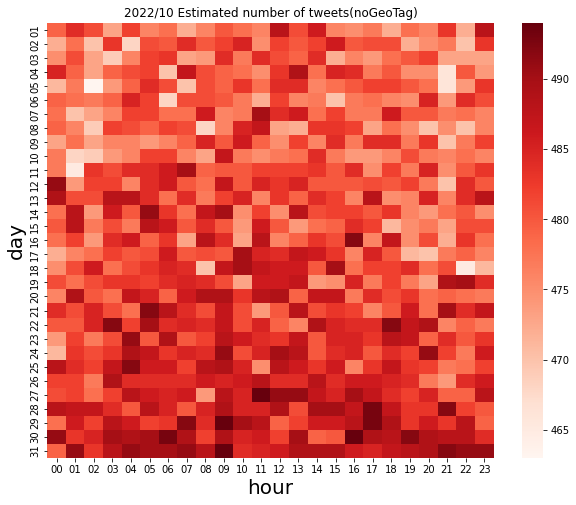

In [22]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(list_tweets_count,xticklabels=hour_list, yticklabels=day_list, cmap="Reds")
heatmap.set_title('2022/10 Estimated number of tweets(noGeoTag)')
heatmap.set_xlabel('hour',fontsize=20)
heatmap.set_ylabel('day',fontsize=20)